In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [6]:
#生成数据集
feature_num = 2
sample_num = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(sample_num,feature_num)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))
print(features,labels)
#print(labels.shape)

tensor([[ 0.0103, -0.7415],
        [-1.6995, -0.3296],
        [ 0.1288, -0.1184],
        ...,
        [-0.1305,  1.0230],
        [ 0.1810, -0.6987],
        [-1.2255,  0.8549]], dtype=torch.float64) tensor([ 6.7344e+00,  1.9285e+00,  4.8473e+00,  8.3590e+00,  4.6599e+00,
         2.6805e+00, -2.5566e-01,  2.6154e+00,  4.8996e+00, -3.0162e+00,
        -1.0374e+00,  2.3815e+00,  8.1006e+00,  5.6517e+00,  2.4090e+00,
        -5.8193e-01,  8.2945e+00,  1.8858e+00,  3.8551e+00,  5.8892e+00,
         1.4704e+01,  2.5688e+00,  1.1360e+00,  4.2452e+00,  6.1114e+00,
        -1.0662e+00,  3.8581e-01,  4.4136e+00,  3.0763e+00,  2.1943e+00,
         7.2275e+00,  5.5016e+00,  4.5483e+00,  5.6913e+00,  6.0268e+00,
         6.0413e+00,  8.4012e-01,  4.2252e+00, -1.0371e+00,  6.7709e+00,
         5.9696e+00, -1.4452e+00,  1.2948e+01,  6.0264e+00,  7.8628e+00,
         6.6095e+00,  4.8620e+00,  8.7355e+00,  6.1745e+00,  3.7192e+00,
         1.2685e+00,  3.8539e+00, -2.9221e+00,  4.0297e+00,  4.6705

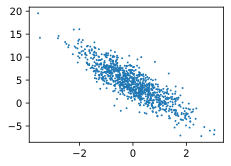

In [4]:
#第二个特征和label之间的散点图观察线性关系
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [5]:
#读取数据
def data_iter(batch_size,features,labels):
    samples_num = len(features)
    indices = list(range(samples_num))
    random.shuffle(indices)
    for i in range(0,samples_num,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,samples_num)])
        yield features.index_select(0,j),labels.index_select(0,j)

batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[-0.1436,  1.6139],
        [ 0.3206,  0.9986],
        [ 0.1739, -1.4955],
        [-2.1152,  1.5597],
        [-0.3825,  1.6607],
        [-0.9853,  0.1938],
        [ 0.3630, -0.9791],
        [-0.4852, -0.2593],
        [ 0.4786, -2.7828],
        [ 0.2466, -0.2335]], dtype=torch.float64) tensor([-1.5815,  1.4470,  9.6170, -5.3324, -2.2114,  1.5556,  8.2714,  4.1087,
        14.6051,  5.4877], dtype=torch.float64)


In [34]:
#初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (feature_num, 1)),
dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

In [35]:
#定义模型
def LinearRegression(X, w, b):
    return torch.mm(X, w) + b

In [36]:
#定义损失函数
def loss(y_hat,y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [37]:
#定义优化算法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [38]:
#训练模型
lr = 0.03
num_epochs = 3

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(LinearRegression(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(LinearRegression(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
    
print(true_w, '\n', w)
print(true_b, '\n', b)

epoch 1, loss 0.048204
epoch 2, loss 0.000211
epoch 3, loss 0.000049
[2, -3.4] 
 tensor([[ 2.0006],
        [-3.3987]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1994], dtype=torch.float64, requires_grad=True)
